In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import random
import decimal
np.random.seed(50)

# Q1

### Draw a network

![title](network.jpeg)

### Write out the mathematical equation

#### $h_1 = ReLu(x_1 * w_{11}+x_2 * w_{21}+b_1)$

$h_2 = ReLu(x_1 * w_{12}+x_2 * w_{22}+b_2)$

$h_3 = ReLu(x_1 * w_{13}+x_2 * w_{23}+b_3)$

ReLu(x) --ReLu activation function

$y = sigmoid(h_1 * v_1 + h_2 * v_2 + h3 * v_3 + c)$

sigmoid(x) -- sigmoid activation function


### Write out the forward-pass function

In [2]:
def ff_nn__ReLu(x, w, b, v, c):
    z_h = []
    z_h.append(x[0] * w[0][0] + x[1] * w[1][0] + b[0])
    z_h.append(x[0] * w[0][1] + x[1] * w[1][1] + b[1])
    z_h.append(x[0] * w[0][2] + x[1] * w[1][2] + b[2])
    H = []
    H.append(max(0,z_h[0]))
    H.append(max(0,z_h[1]))
    H.append(max(0,z_h[2]))
    
    y_temp = H[0] * v[0] + H[1] * v[1] + H[2] * v[2] + c[0]
    # if use sigmoid as soft function
    y_hat = 1 / (1 + np.exp(-y_temp))
    return z_h, H, y_temp, y_hat
    
    

## class probabilities associated with the forward pass of each sample

In [3]:
x = [[-1.0158154312567058, --1.9780325344010552], [0, -1], [0, 1]]
w = [[1, -1, 0], [0, 0, 0.5]]
b = [0, 0, 1]
v = [1, 0, -1]
c = [1]

for i in range(len(x)):
    _, _, _, y_hat = ff_nn__ReLu(x[i], w, b, v, c)
    print("Input: ", x[i])
    print("Prediction: ", y_hat)

Input:  [-1.0158154312567058, 1.9780325344010552]
Prediction:  0.27110642708100635
Input:  [0, -1]
Prediction:  0.6224593312018546
Input:  [0, 1]
Prediction:  0.3775406687981454


# Q2

### What are the partial derivatives of f with respect to x and to y

#### $\frac{\partial f}{\partial x} = -3x^2-200y^2 +200x$

$\frac{\partial f}{\partial y} = 400y^3-400xy$


### Create a visualization of the contours

In [4]:
def f(x, y):
    return (1 - x ** 3) + 100 * (y ** 2 - x) ** 2

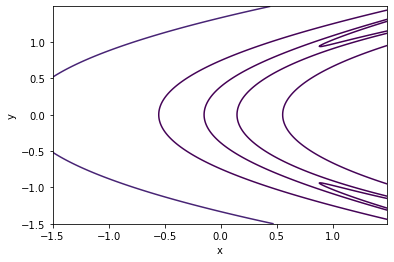

In [5]:
delta = 0.01
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig, ax = plt.subplots()
ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()



### Write a Gradient Descent algorithm

In [6]:
def gradient_f(x, y):
    x = round(x, 5)
    y = round(y, 5)
    gx = -3 * x ** 2 - 200 * y ** 2 + 200 * x
    gy = 400 * y ** 3 - 400 * x * y
    return gx, gy

In [7]:
def gradient_descent(x_init, y_init, lr, iters):
    gd_x = []
    gd_y = []
    x = x_init
    y = y_init
    gd_x.append(x)
    gd_y.append(y)
    for i in range(iters):
        gx, gy = gradient_f(x, y)
        x = x - lr * gx
        y = y - lr * gy
        gd_x.append(x)
        gd_y.append(y)
    return gd_x, gd_y
        
        

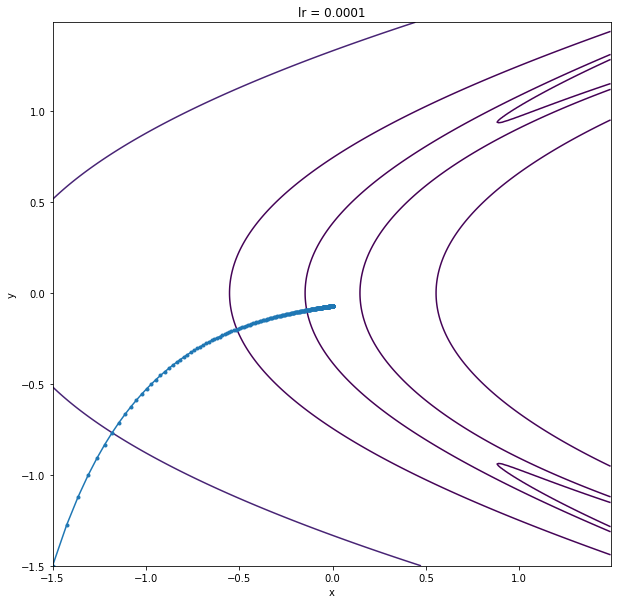

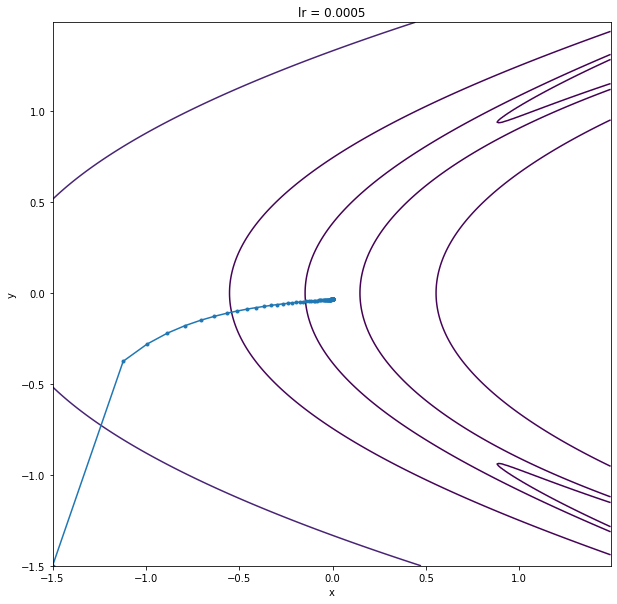

In [8]:
x_init = -1.5
y_init = -1.5
lrs = [0.0001, 0.0005]
iters = 1000
for lr in lrs:
    gd_x, gd_y = gradient_descent(x_init, y_init, lr, iters)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    s = 'lr = ' + str(lr)
    ax.set_title(s)
    plt.plot(gd_x, gd_y,'.-')
    plt.show()

    


### Write a Gradient Descent With Momentum algorithm

In [9]:
def gradient_descent_momentum(x_init, y_init, lr, iters, alpha):
    gd_x = []
    gd_y = []
    x = x_init
    y = y_init
    gd_x.append(x)
    gd_y.append(y)
    vx = 0.0
    vy = 0.0
    for i in range(iters):
        gx, gy = gradient_f(x, y)
        vx = alpha * vx - lr * gx
        vy = alpha * vy - lr * gy
        x = x + vx
        y = y + vy
        gd_x.append(x)
        gd_y.append(y)
    return gd_x, gd_y

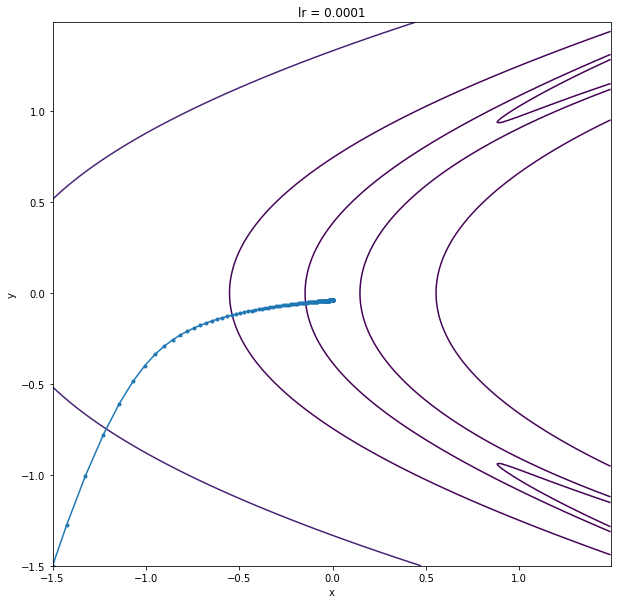

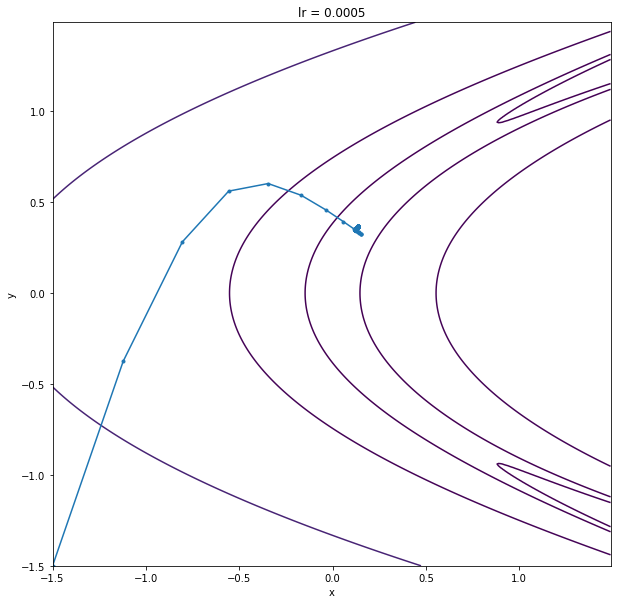

In [10]:
alpha = 0.5
for lr in lrs:
    gd_x, gd_y = gradient_descent_momentum(x_init, y_init, lr, iters, alpha)
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.contour(X, Y, Z, np.logspace(-0.5,3.5,5,base=10))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    s = 'lr = ' + str(lr)
    ax.set_title(s)
    plt.plot(gd_x, gd_y,'.-')
    plt.show()

# Q3

### derive expressions of the gradient of the Loss function

#### $L = -y log(\hat y) - (1-y)log(1-\hat y)$

$\frac{\partial L}{\partial \hat y} = -(\frac{y}{\hat y} - \frac{1-y}{1-\hat y})$

$ReLU(x) = max(0, x)$

if x > 0: $\frac{\partial ReLu}{dx}  = 1$

else: $\frac{\partial ReLu}{dx}  = 0$



$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial c} =  -(\frac{y}{\hat y} - \frac{1-y}{1-\hat y}) (\hat y (1 - \hat y))$

$\frac{\partial L}{\partial v_i} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial v_i} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y)) h_{iout}$


$\frac{\partial L}{\partial b_i} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial h_{iout}}\frac{\partial h_{iout}}{\partial h_{iin}}\frac{\partial h_{iin}}{\partial b_i} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y))v_i\frac{\partial}{\partial h_{iin}}ReLU(h_{iin})$

$\frac{\partial L}{\partial w_{ij}} = \frac{\partial L}{\partial \hat y} \frac{\partial \hat y}{\partial h_{jout}}\frac{\partial h_{jout}}{\partial h_{jin}}\frac{\partial h_{jin}}{\partial w_{ij}} = \frac{\partial L}{\partial \hat y}(\hat y (1 - \hat y))v_j\frac{\partial}{\partial h_{jin}}ReLU(h_{jin})x_i$




### takes in a weights vector and returns the gradient of the Loss at that location.

In [11]:
def grad_f(X, W, B, V, c, y):
    Hin = X.dot(W) + B
    H1in = Hin[:, 0].reshape((Hin.shape[0],1))
    H2in = Hin[:, 1].reshape((Hin.shape[0],1))
    H3in = Hin[:, 2].reshape((Hin.shape[0],1))
    Hout = np.maximum(Hin,0)
    H1out = Hout[:, 0].reshape((Hout.shape[0],1))
    H2out = Hout[:, 1].reshape((Hout.shape[0],1))
    H3out = Hout[:, 2].reshape((Hout.shape[0],1))
    y_hat  = 1 / (1 + np.exp(- (Hout.dot(V) + c)))
    loss = np.average(-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
    g_c = np.average(-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat))
    
    g_v1 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) * H1out)
    g_v2 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) * H2out)
    g_v3 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) * H3out)
    
    g_b1 = np.average(((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[0]) * np.where(H1in > 0, 1, 0))
    g_b2 = np.average(((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[1]) * np.where(H2in > 0, 1, 0))
    g_b3 = np.average(((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[2]) * np.where(H3in > 0, 1, 0))
    
    
    X1 = X[:, 0].reshape((X.shape[0], 1))
    X2 = X[:, 1].reshape((X.shape[0], 1))
    g_w11 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[0] * np.where(H1in > 0, 1, 0) * X1)
    g_w12 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[1] * np.where(H2in > 0, 1, 0) * X1)
    g_w13 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[2] * np.where(H3in > 0, 1, 0) * X1)
    g_w21 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[0] * np.where(H1in > 0, 1, 0) * X2)
    g_w22 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[1] * np.where(H2in > 0, 1, 0) * X2)
    g_w23 = np.average((-(y / y_hat - (1 - y) / (1 - y_hat)) * y_hat * (1 - y_hat)) *V[2] * np.where(H3in > 0, 1, 0) * X2)
   
    return loss, g_c, g_v1, g_v2, g_v3, g_b1, g_b2, g_b3, g_w11, g_w12, g_w13, g_w21, g_w22, g_w23
    

### Generate a synthetic dataset like the XOR pattern

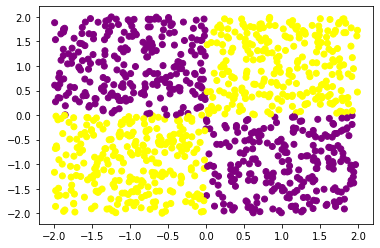

In [12]:
def xor(num):
    rand = np.random.uniform(-2, 2, num * 2).reshape(num, 2)
    label = np.full((num, 1), 1)
    color = []
    for i in range(num):
        if rand[i][0] * rand[i][1] > 0:
            label[i][0] = 1
            color.append('yellow')
        else:
            label[i][0] = 0
            color.append('purple')
    return rand, color, label
   
num = 1000
rand, color, label = xor(num)
plt.scatter(rand[:,0],rand[:, 1], color = color)
plt.show()

            
    


### Fit your network using Gradient Descent

Text(0, 0.5, 'loss')

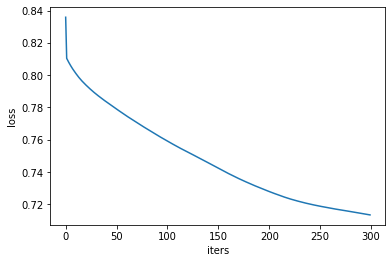

In [13]:
lr = 0.01
iters = 300
W = np.random.rand(2, 3)
V = np.random.rand(3, 1)
B = np.random.rand(1, 3)
c = np.random.rand(1)
losses = []
boundry = 0
for i in range(iters):
    up = 100
    batch_size = 100
    loss = []
    
    
    while up < len(label):
        x = rand[up - batch_size: up,:]
        y = label[up - batch_size: up,:]
        
        temp_loss, g_c, g_v1, g_v2, g_v3, g_b1, g_b2, g_b3, g_w11, g_w12, g_w13, g_w21, g_w22, g_w23 = grad_f(x, W, B, V, c, y)
        loss.append(temp_loss)
        c = c - lr * g_c
        W[0][0] = w[0][0] - lr * g_w11
        W[0][1] = w[0][1] - lr * g_w12
        W[0][2] = w[0][2] - lr * g_w13
        W[1][0] = w[1][0] - lr * g_w21
        W[1][1] = w[1][1] - lr * g_w22
        W[1][2] = w[1][2] - lr * g_w23
        V[0] = v[0] - lr * g_v1
        V[1] = v[1] - lr * g_v2
        V[2] = v[2] - lr * g_v3
        B[0][0] = B[0][0] - lr * g_b1
        B[0][1] = B[0][1] - lr * g_b2
        B[0][2] = B[0][2] - lr * g_b3
        up += batch_size
    losses.append(np.average(np.array(loss)))
    boundry = (W[0][0],W[0][1],W[0][2],W[1][0],W[1][1],W[1][2],B[0][0],B[0][1],B[0][2],V[0],V[1],V[2],c)
plt.plot(losses)
plt.xlabel('iters')
plt.ylabel('loss')
        
        
    
    

### Repeat the exercise above using Momentum

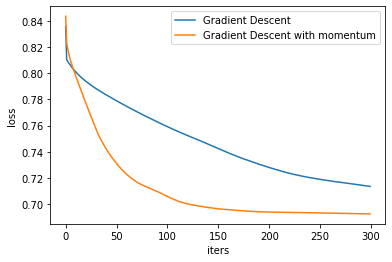

In [14]:
lr = 0.01
iters = 300
W = np.random.rand(2, 3) 
V = np.random.rand(3, 1) 
B = np.random.rand(1, 3)
c = np.random.rand(1) 

m_losses = []
for i in range(iters):
    up = 100
    batch_size = 100
    loss = []
    
    h_c = 0
    
    h_v1 = 0
    h_v2 = 0
    h_v3 = 0
    
    h_b1 = 0
    h_b2 = 0
    h_b3 = 0
    
    h_w11 = 0
    h_w12 = 0
    h_w13 = 0
    h_w21 = 0
    h_w22 = 0
    h_w23 = 0
    
    alpha = 0.9
    while up < len(label):
        x = rand[up - batch_size: up,:]
        y = label[up - batch_size: up,:]
        
        temp_loss, g_c, g_v1, g_v2, g_v3, g_b1, g_b2, g_b3, g_w11, g_w12, g_w13, g_w21, g_w22, g_w23 = grad_f(x, W, B, V, c, y)
        loss.append(temp_loss)
        h_c = alpha * h_c - lr * g_c 
        c = c + h_c
        h_w11 = alpha * h_w11 - lr * g_w11 
        W[0][0] = w[0][0] + h_w11
        h_w12 = alpha * h_w12 - lr * g_w12
        W[0][1] = w[0][1] + h_w12
        h_w13 = alpha * h_w13 - lr * g_w13
        W[0][2] = w[0][2] + h_w13
        h_w21 = alpha * h_w21 - lr * g_w21
        W[1][0] = w[1][0] + h_w21
        h_w22 = alpha * h_w22 - lr * g_w22
        W[1][1] = w[1][1] + h_w22
        h_w23 = alpha * h_w23 - lr * g_w23
        W[1][2] = w[1][2] + h_w23
        h_v1 = alpha * h_v1 - lr * g_v1
        V[0] = v[0] + h_v1
        h_v2 = alpha * h_v2 - lr * g_v2
        V[1] = v[1] + h_v2
        h_v3 = alpha * h_v3 - lr * g_v3
        V[2] = v[2] + h_v3
        h_b1 = alpha * h_b1 - lr * g_b1
        B[0][0] = B[0][0] + h_b1
        h_b2 = alpha * h_b2 - lr * g_b2
        B[0][1] = B[0][1] + h_b2
        h_b3 = alpha * h_b3 - lr * g_b3
        B[0][2] = B[0][2] + h_b3
        
        up += batch_size
    m_losses.append(np.average(np.array(loss)))
plt.plot(losses, label = "Gradient Descent")
plt.plot(m_losses, label = "Gradient Descent with momentum")
plt.xlabel('iters')
plt.ylabel('loss')
plt.legend(loc = "upper right")

#### it seems like using momentum, the network works more effecient

### Plot a visualization of the final decision boundary that your model has learned

In [15]:
def yhat(x,coeffs):
    
    w11,w12,w13,w21,w22,w23,b11,b12,b13,v1,v2,v3,c = coeffs
    
    w = np.array([[w11,w12,w13],[w21,w22,w23]])
    b = np.array([b11,b12,b13])
    v = np.array([[v1],[v2],[v3]])
    print(x.shape)
    a = np.dot(x, w) + b
    
    h = np.maximum(a,0)
    
    z = np.dot(h, v) + c
    y_hat = sigmoid(z)
    
    return y_hat

In [16]:
def plot_decision_boundary(x,y,params):
    print(x.shape)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    _in=np.array([xx.ravel(), yy.ravel()]).T
    Hin = _in.dot(W) + B
    H1in = Hin[:, 0].reshape((Hin.shape[0],1))
    H2in = Hin[:, 1].reshape((Hin.shape[0],1))
    H3in = Hin[:, 2].reshape((Hin.shape[0],1))
    Hout = np.maximum(Hin,0)
    H1out = Hout[:, 0].reshape((Hout.shape[0],1))
    H2out = Hout[:, 1].reshape((Hout.shape[0],1))
    H3out = Hout[:, 2].reshape((Hout.shape[0],1))
    z  = 1 / (1 + np.exp(- (Hout.dot(V) + c)))
    z=z>0.5
    z=z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.2)
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(y))

(1000, 2)


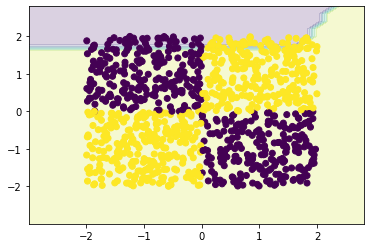

In [17]:
plot_decision_boundary(rand, label, boundry)